In [2]:
raw_data <- read.csv("Data_SSL_PSM_FULL.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 290170

In [3]:
final_features<-raw_data[,c('SSL_SCORE','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','RACE_CODE_CD')]

In [4]:
complete_data <- final_features[complete.cases(final_features),]

In [5]:
nrow(complete_data)

[1] 290085

In [6]:
library(MatchIt)
library(dplyr)
library(ggplot2)

Warning message:
"package 'MatchIt' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [7]:
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,207775,282.473,0.1349082
1,82310,269.846,0.1968233


In [8]:
with(complete_data, t.test(SSL_SCORE~ RACE_CODE_CD))


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = 52.917, df = 163520, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 12.15928 13.09466
sample estimates:
mean in group 0 mean in group 1 
        282.473         269.846 


In [9]:
ecls_cov <- c( 'PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
               'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
               'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS')

In [10]:
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  select(one_of(ecls_cov)) %>%
  summarise_all(funs(mean(., na.rm = T)))

Adding missing grouping variables: `RACE_CODE_CD`


RACE_CODE_CD,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS
0,0.032544820,0.052229575,0.16452412,0.23300686,0.4568644,-0.06429118,0.04922151
1,0.001931722,0.009488519,0.04773418,0.02988701,0.2182967,-0.02426923,0.01021747


In [11]:
lapply(ecls_cov, function(v) {
    t.test(complete_data[, v] ~ complete_data[, 'RACE_CODE_CD'])
})

[[1]]

	Welch Two Sample t-test

data:  complete_data[, v] by complete_data[, "RACE_CODE_CD"]
t = 67.159, df = 259780, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02971968 0.03150652
sample estimates:
mean in group 0 mean in group 1 
    0.032544820     0.001931722 


[[2]]

	Welch Two Sample t-test

data:  complete_data[, v] by complete_data[, "RACE_CODE_CD"]
t = 63.353, df = 287310, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04141876 0.04406336
sample estimates:
mean in group 0 mean in group 1 
    0.052229575     0.009488519 


[[3]]

	Welch Two Sample t-test

data:  complete_data[, v] by complete_data[, "RACE_CODE_CD"]
t = 85.721, df = 275860, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1141196 0.1194603
sample estimates:
mean in group 0 mean in group 1 
  

In [12]:
m_ps <- glm(RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST  + PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
            family = binomial(), data = complete_data)
summary(m_ps)


Call:
glm(formula = RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST + 
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + 
    PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + 
    PREDICTOR_RAT_UUW_ARRESTS, family = binomial(), data = complete_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1778  -0.9499  -0.6611   1.3804   4.8554  

Coefficients:
                                                Estimate Std. Error z value
(Intercept)                                    -0.506798   0.007673 -66.048
PREDICTOR_RAT_AGE_AT_LATEST_ARREST30-40         0.038752   0.011742   3.300
PREDICTOR_RAT_AGE_AT_LATEST_ARREST40-50        -0.032543   0.013023  -2.499
PREDICTOR_RAT_AGE_AT_LATEST_ARREST50-60        -0.133230   0.015062  -8.845
PREDICTOR_RAT_AGE_AT_LATEST_ARREST60-70        -0.009015   0.027389  -0.329
PREDICTOR_RAT_AGE_

In [13]:
prs_df <- data.frame(pr_score = predict(m_ps, type = "response"),
                     RACE_CODE_CD = m_ps$model$RACE_CODE_CD)
head(prs_df)

pr_score,RACE_CODE_CD
2.040449e-03,0
7.599459e-06,1
7.691906e-04,1
4.493660e-04,0
8.264588e-03,0
3.217104e-05,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


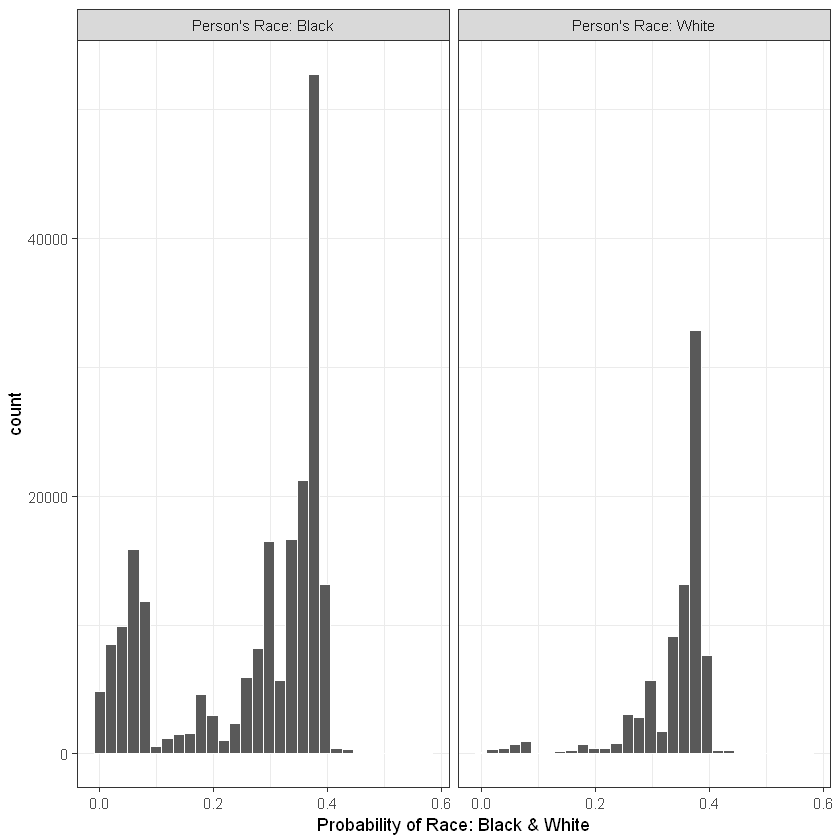

In [14]:
labs <- paste("Person's Race:", c("Black", "White"))
prs_df %>%
  mutate(RACE_CODE_CD = ifelse(RACE_CODE_CD == 0, labs[1], labs[2])) %>%
  ggplot(aes(x = pr_score)) +
  geom_histogram(color = "white") +
  facet_wrap(~RACE_CODE_CD) +
  xlab("Probability of Race: Black & White") +
  theme_bw()

In [15]:
ecls_nomiss <- complete_data %>%  # MatchIt does not allow missing values
  select(SSL_SCORE, RACE_CODE_CD,PREDICTOR_RAT_AGE_AT_LATEST_ARREST, one_of(ecls_cov)) %>%
  na.omit()


In [16]:
mod_match <- matchit(RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST  + PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = ecls_nomiss)

In [17]:
mod_match


Call: 
matchit(formula = RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST + 
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + 
    PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + 
    PREDICTOR_RAT_UUW_ARRESTS, data = ecls_nomiss, method = "nearest")

Sample sizes:
          Control Treated
All        207775   82310
Matched     82310   82310
Unmatched  125465       0
Discarded       0       0


In [38]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

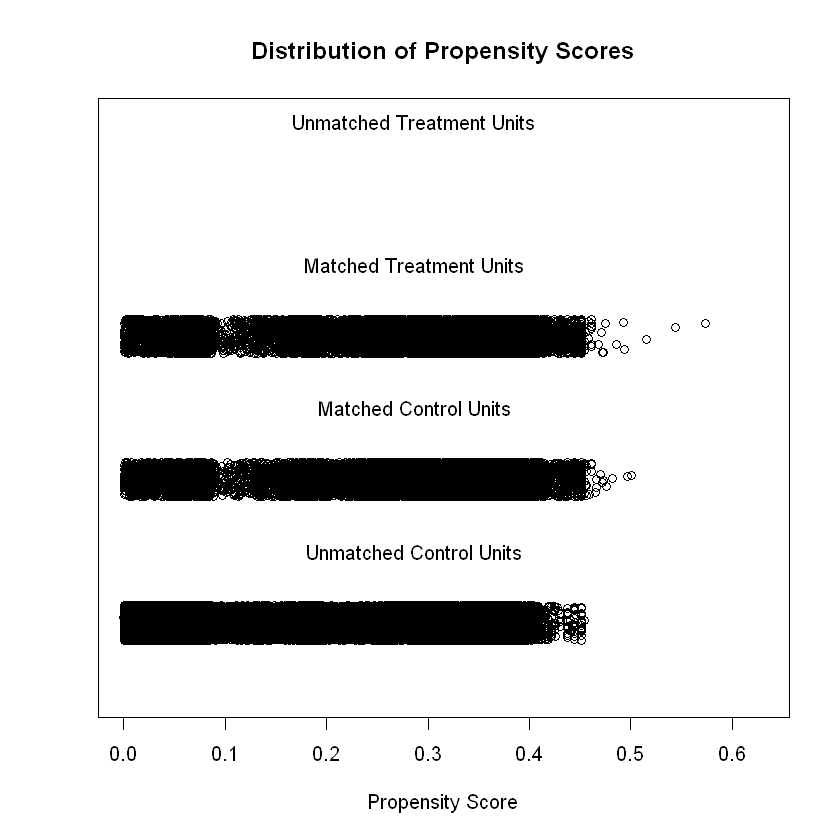

In [47]:
plot(mod_match, type = "jitter")

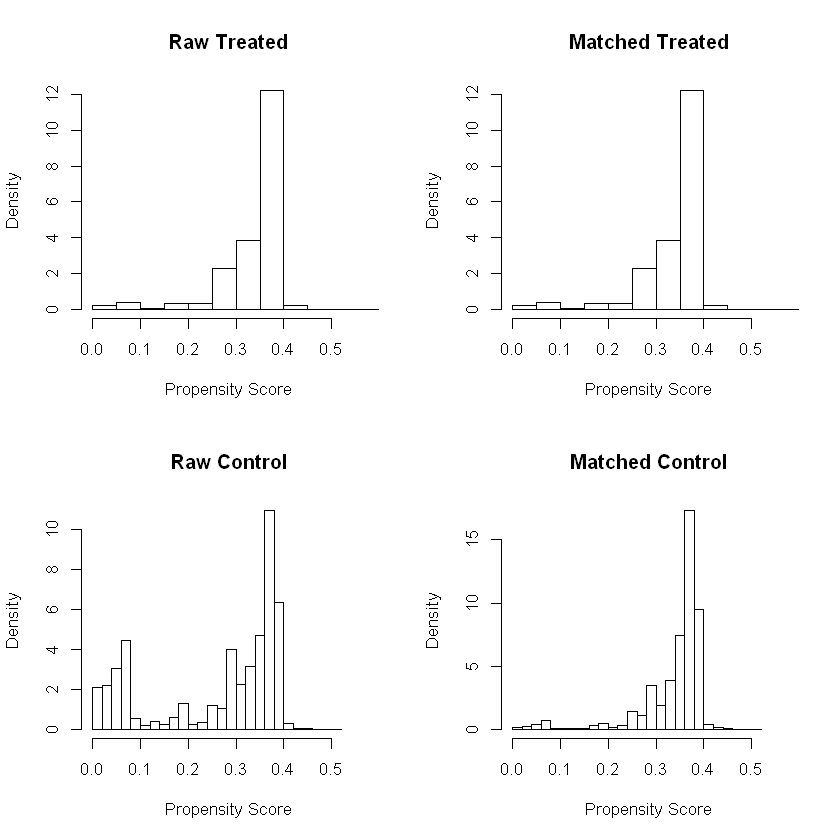

In [48]:
plot(mod_match, type = "hist")

In [35]:
head(matched)

,SSL_SCORE,RACE_CODE_CD,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,distance,weights
2,500,1,20-30,0,9,1,1,0,1.0,0,7.599459e-06,1
3,500,1,less than 20,1,2,1,1,3,1.0,0,7.691906e-04,1
8,497,0,less than 20,0,0,7,0,3,0.7,1,3.424591e-03,1
11,488,0,20-30,0,0,0,1,29,-3.4,0,3.789619e-04,1
13,485,1,less than 20,1,3,1,1,0,0.6,0,4.520438e-04,1
32,455,1,20-30,2,2,2,1,3,0.7,0,1.536377e-04,1


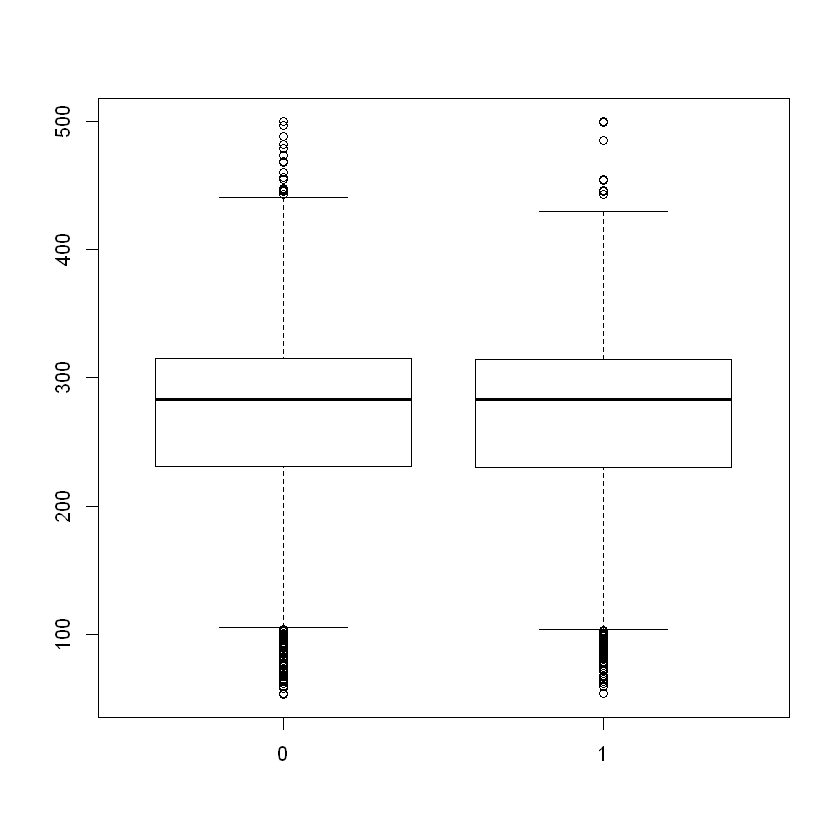

In [37]:
# Doing T - test on matched records
attach(matched)
boxplot(SSL_SCORE~RACE_CODE_CD)

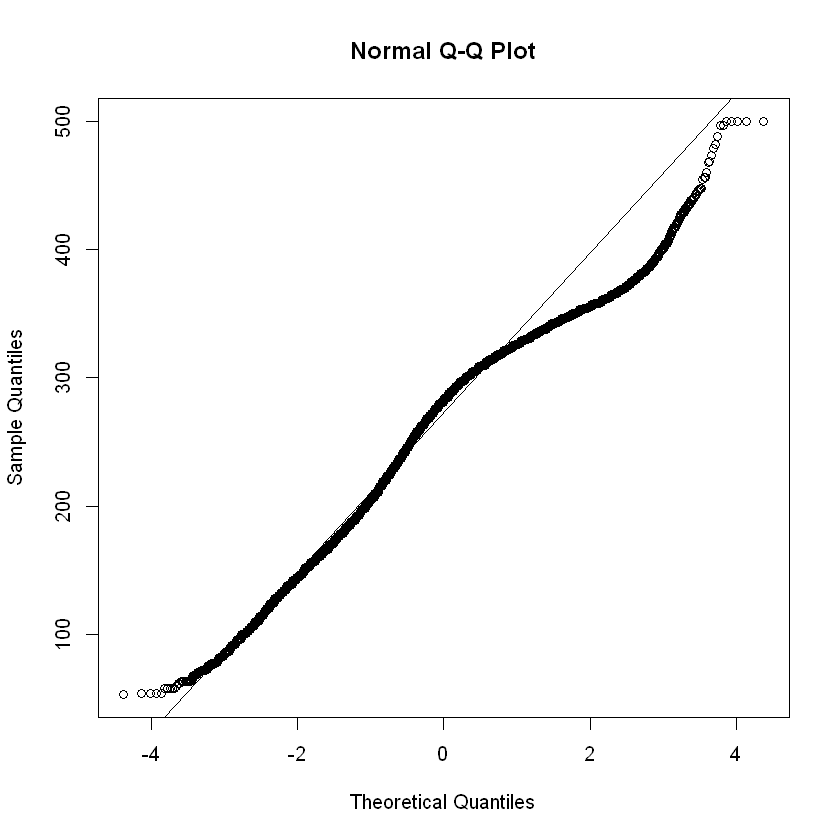

In [44]:
race_black <-subset(matched,RACE_CODE_CD == 0)
race_white<-subset(matched,RACE_CODE_CD == 1)
# Normal QQ Plot for RACE == BLACK
qqnorm(race_black$SSL_SCORE)
qqline(race_black$SSL_SCORE)

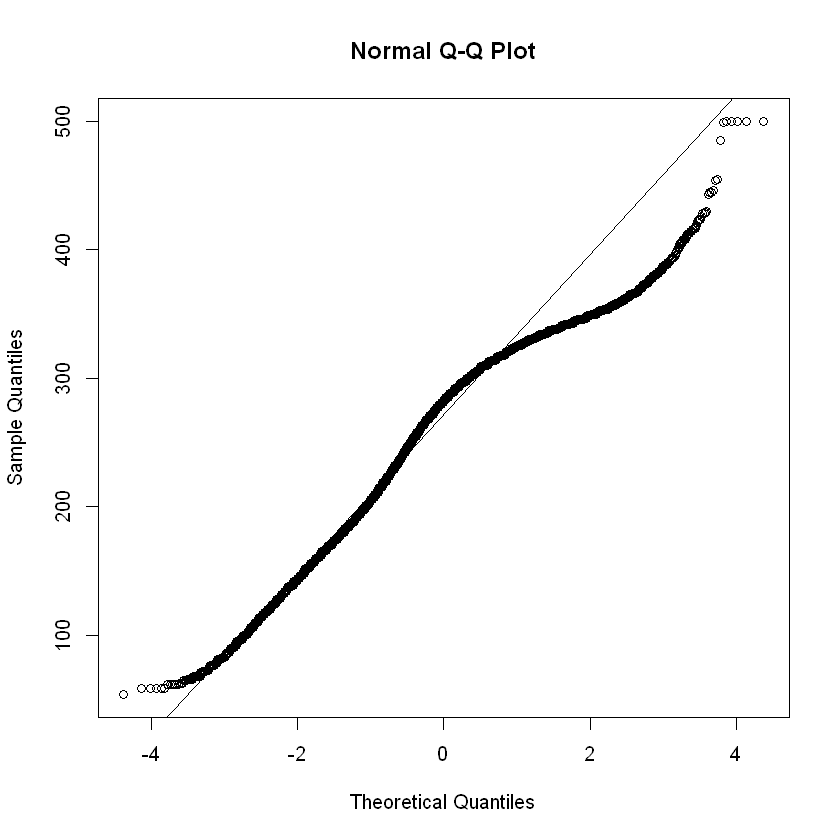

In [45]:
# Normal QQ Plot for RACE == WHITE
qqnorm(race_white$SSL_SCORE)
qqline(race_white$SSL_SCORE)

In [46]:
t.test(SSL_SCORE~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = 3.0445, df = 164550, p-value = 0.002331
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3050383 1.4076090
sample estimates:
mean in group 0 mean in group 1 
       270.7023        269.8460 
